# TOPMODEL testing: attempting to create more moist areas within Lompolonjängänoja catchment

In [17]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iotools import read_AsciiGrid
import hvplot.xarray # noqa
import panel.widgets as pnw
eps = np.finfo(float).eps  # machine epsilon

#file1 = r'F:\SpaFHy_2D_2021/testcase_input_202304111218.nc' # twi_cutoff = 99.5
file1 = r'F:\SpaFHy_2D_2021/testcase_input_202304131806.nc' # twi_cutoff = 99.5

#file2 = r'F:\SpaFHy_2D_2021/testcase_input_202304111220.nc' # twi_cutoff = 97.5
file2 = r'F:\SpaFHy_2D_2021/testcase_input_202304141205.nc' # twi_cutoff = 97.5

#file3 = r'F:\SpaFHy_2D_2021/testcase_input_202304111223.nc' # twi_cutoff = 95.5
file3 = r'F:\SpaFHy_2D_2021/testcase_input_202304131809.nc' # twi_cutoff = 95.5
file3 = r'F:\SpaFHy_2D_2021/testcase_input_202305051534.nc' # twi_cutoff = 97.5 ; m = 0.025
file3 = r'F:\SpaFHy_2D_2021/testcase_input_202305051544.nc' # twi_cutoff = 97.5 ; m = 0.005

file4 = r'F:\SpaFHy_2D_2021/testcase_input_202304131713.nc' # twi_cutoff = 99.5 and ditches masked out

#file5 = r'F:\SpaFHy_2D_2021/testcase_input_202304111320.nc' # saga twi_cutoff = 99.5
file5 = r'F:\SpaFHy_2D_2021/testcase_input_202304131814.nc' # saga twi_cutoff = 99.5

#file6 = r'F:\SpaFHy_2D_2021/testcase_input_202304111318.nc' # saga twi_cutoff = 97.5
file6 = r'F:\SpaFHy_2D_2021/testcase_input_202304131813.nc' # saga twi_cutoff = 97.5

#file7 = r'F:\SpaFHy_2D_2021/testcase_input_202304111315.nc' # saga twi_cutoff = 95.5
file7 = r'F:\SpaFHy_2D_2021/testcase_input_202304131811.nc' # saga twi_cutoff = 95.5

file8 = r'F:\SpaFHy_2D_2021/testcase_input_202304131711.nc' # saga twi_cutoff = 99.5 and ditches masked out

file9 = r'F:\SpaFHy_2D_2021/testcase_input_202304131707.nc' # twi_cutoff = 97.5 and ditches masked out
file10 = r'F:\SpaFHy_2D_2021/testcase_input_202304131708.nc' # saga twi_cutoff = 97.5 and ditches masked out

In [18]:
twi1 = xr.open_dataset(file1)
twi2 = xr.open_dataset(file2)
twi3 = xr.open_dataset(file3)
twi4 = xr.open_dataset(file4)
twi5 = xr.open_dataset(file9)

swi1 = xr.open_dataset(file5)
swi2 = xr.open_dataset(file6)
swi3 = xr.open_dataset(file7)
swi4 = xr.open_dataset(file8)
swi5 = xr.open_dataset(file10)

In [19]:
ditchmask = twi1['parameters_ditches'].values
ditchmask = np.where(np.isfinite(ditchmask), np.nan, 1)

#### TWI maps with different method and cutoff values

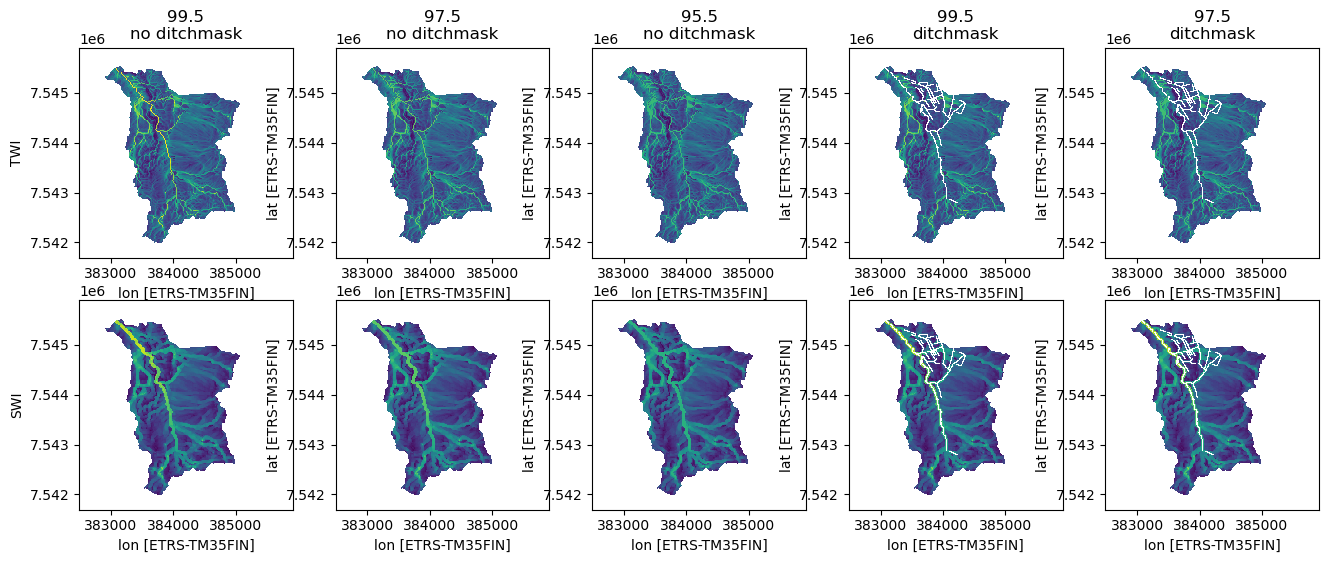

In [4]:
plt.figure(figsize=(16,6))
ax = plt.subplot(2,5,1)
twi1['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.title('99.5\nno ditchmask')
plt.ylabel('TWI')
plt.subplot(2,5,2)
twi2['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.title('97.5\nno ditchmask')
plt.subplot(2,5,3)
twi3['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.title('95.5\nno ditchmask')
plt.subplot(2,5,4)
twi4['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.title('99.5\nditchmask')
plt.subplot(2,5,5)
twi5['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.title('97.5\nditchmask')
plt.subplot(2,5,6)
swi1['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.ylabel('SWI')
plt.subplot(2,5,7)
swi2['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.subplot(2,5,8)
swi3['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.subplot(2,5,9)
swi4['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)
plt.subplot(2,5,10)
swi4['parameters_twi'].plot(add_colorbar=False, vmin=4, vmax=16)

### TWI and SWI with different cutoff values

Text(0.5, 1.0, 'ditchmask')

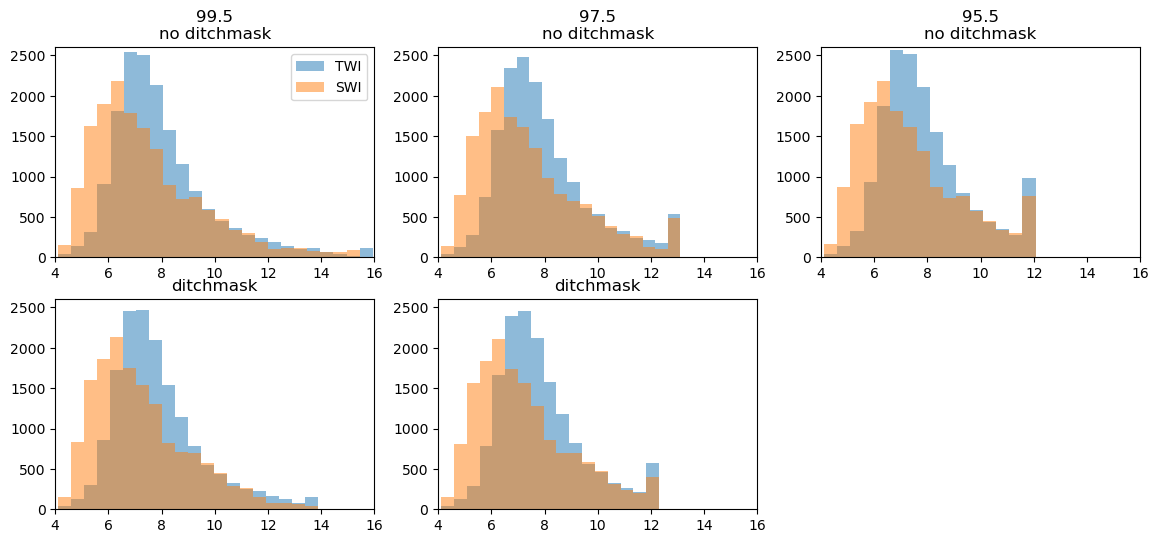

In [5]:
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
bint = len(np.arange(np.sort(twi1['parameters_twi'].values.flatten()[~np.isnan(twi1['parameters_twi'].values.flatten())])[0], 
                    np.sort(twi1['parameters_twi'].values.flatten()[~np.isnan(twi1['parameters_twi'].values.flatten())])[-1], 0.5))  
bins = len(np.arange(np.sort(swi1['parameters_twi'].values.flatten()[~np.isnan(swi1['parameters_twi'].values.flatten())])[0], 
                    np.sort(swi1['parameters_twi'].values.flatten()[~np.isnan(swi1['parameters_twi'].values.flatten())])[-1], 0.5))
n, bins, patches = plt.hist(twi1['parameters_twi'].values.flatten(), bins=bint, alpha=0.5, label='TWI')
n, bins, patches = plt.hist(swi1['parameters_twi'].values.flatten(), bins=bins, alpha=0.5, label='SWI')
plt.ylim([0,2600])
plt.xlim([4,16])
plt.legend()
plt.title('99.5\nno ditchmask')
plt.subplot(2,3,2)
bint = len(np.arange(np.sort(twi2['parameters_twi'].values.flatten()[~np.isnan(twi2['parameters_twi'].values.flatten())])[0], 
                    np.sort(twi2['parameters_twi'].values.flatten()[~np.isnan(twi2['parameters_twi'].values.flatten())])[-1], 0.5))  
bins = len(np.arange(np.sort(swi2['parameters_twi'].values.flatten()[~np.isnan(swi2['parameters_twi'].values.flatten())])[0], 
                    np.sort(swi2['parameters_twi'].values.flatten()[~np.isnan(swi2['parameters_twi'].values.flatten())])[-1], 0.5))

n, bins, patches = plt.hist(twi2['parameters_twi'].values.flatten(), bins=bint, alpha=0.5, label='TWI')
n, bins, patches = plt.hist(swi2['parameters_twi'].values.flatten(), bins=bins, alpha=0.5, label='SWI')
plt.ylim([0,2600])
plt.xlim([4,16])
plt.title('97.5\nno ditchmask')
plt.subplot(2,3,3)
bint = len(np.arange(np.sort(twi3['parameters_twi'].values.flatten()[~np.isnan(twi3['parameters_twi'].values.flatten())])[0], 
                    np.sort(twi3['parameters_twi'].values.flatten()[~np.isnan(twi3['parameters_twi'].values.flatten())])[-1], 0.5))  
bins = len(np.arange(np.sort(swi3['parameters_twi'].values.flatten()[~np.isnan(swi3['parameters_twi'].values.flatten())])[0], 
                    np.sort(swi3['parameters_twi'].values.flatten()[~np.isnan(swi3['parameters_twi'].values.flatten())])[-1], 0.5))
n, bins, patches = plt.hist(twi3['parameters_twi'].values.flatten(), bins=bint, alpha=0.5, label='TWI')
n, bins, patches = plt.hist(swi3['parameters_twi'].values.flatten(), bins=bins, alpha=0.5, label='SWI')
plt.ylim([0,2600])
plt.xlim([4,16])
plt.title('95.5\nno ditchmask')
plt.subplot(2,3,4)
bint = len(np.arange(np.sort(twi4['parameters_twi'].values.flatten()[~np.isnan(twi4['parameters_twi'].values.flatten())])[0], 
                    np.sort(twi4['parameters_twi'].values.flatten()[~np.isnan(twi4['parameters_twi'].values.flatten())])[-1], 0.5))  
bins = len(np.arange(np.sort(swi4['parameters_twi'].values.flatten()[~np.isnan(swi4['parameters_twi'].values.flatten())])[0], 
                    np.sort(swi4['parameters_twi'].values.flatten()[~np.isnan(swi4['parameters_twi'].values.flatten())])[-1], 0.5))
n, bins, patches = plt.hist(twi4['parameters_twi'].values.flatten(), bins=bint, alpha=0.5, label='TWI')
n, bins, patches = plt.hist(swi4['parameters_twi'].values.flatten(), bins=bins, alpha=0.5, label='SWI')
plt.ylim([0,2600])
plt.xlim([4,16])
plt.title('ditchmask')
plt.subplot(2,3,5)
bint = len(np.arange(np.sort(twi5['parameters_twi'].values.flatten()[~np.isnan(twi5['parameters_twi'].values.flatten())])[0], 
                    np.sort(twi5['parameters_twi'].values.flatten()[~np.isnan(twi5['parameters_twi'].values.flatten())])[-1], 0.5))  
bins = len(np.arange(np.sort(swi5['parameters_twi'].values.flatten()[~np.isnan(swi5['parameters_twi'].values.flatten())])[0], 
                    np.sort(swi5['parameters_twi'].values.flatten()[~np.isnan(swi5['parameters_twi'].values.flatten())])[-1], 0.5))
n, bins, patches = plt.hist(twi5['parameters_twi'].values.flatten(), bins=bint, alpha=0.5, label='TWI')
n, bins, patches = plt.hist(swi5['parameters_twi'].values.flatten(), bins=bins, alpha=0.5, label='SWI')
plt.ylim([0,2600])
plt.xlim([4,16])
plt.title('ditchmask')

### Local mean saturation deficit, runoff and maximum rootzone moisture

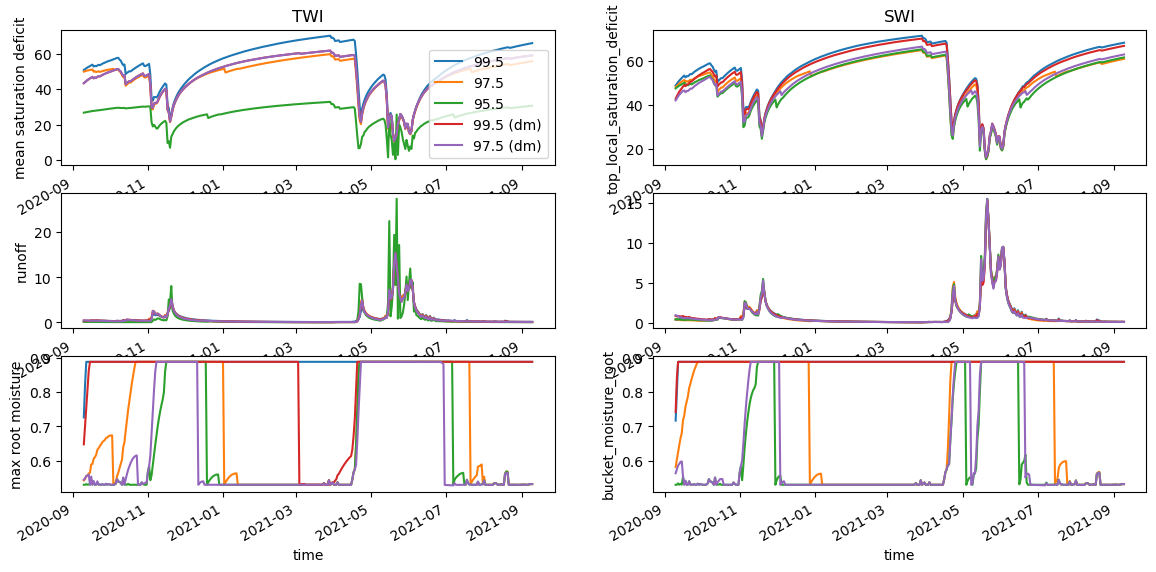

In [20]:
plt.figure(figsize=(14,6))
ax = plt.subplot(3,2,1)
twi1['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot(label='99.5')
twi2['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot(label='97.5')
twi3['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot(label='95.5')
twi4['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot(label='99.5 (dm)')
twi4['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot(label='97.5 (dm)')
plt.legend()
plt.ylabel('mean saturation deficit')
plt.title('TWI')
plt.subplot(3,2,2)
swi1['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi2['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi3['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi4['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi5['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
plt.title('SWI')
plt.subplot(3,2,3)
(twi1['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi1['top_baseflow']).plot()
(twi2['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi2['top_baseflow']).plot()
(twi3['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi3['top_baseflow']).plot()
(twi4['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi4['top_baseflow']).plot()
(twi5['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi5['top_baseflow']).plot()
plt.ylabel('runoff')
plt.subplot(3,2,4)
(swi1['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi1['top_baseflow']).plot()
(swi2['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi2['top_baseflow']).plot()
(swi3['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi3['top_baseflow']).plot()
(swi4['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi4['top_baseflow']).plot()
(swi5['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi5['top_baseflow']).plot()
plt.subplot(3,2,5)
twi1['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
twi2['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
twi3['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
twi4['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
twi5['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
plt.ylabel('max root moisture')
plt.subplot(3,2,6)
swi1['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
swi2['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
swi3['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
swi4['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()
swi5['bucket_moisture_root'].max(dim=['lat', 'lon']).plot()


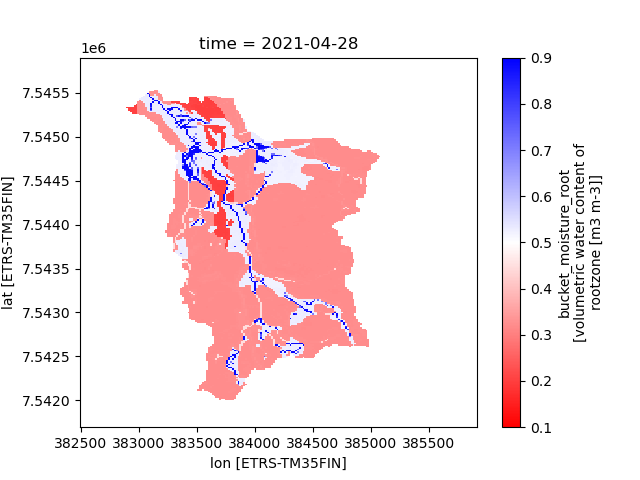

In [7]:
time = pnw.Player(name='time', start=230, end=364, loop_policy='loop', interval=365)
twi1['bucket_moisture_root'].interactive(loc='bottom').isel(time=time).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)

### Plotting results with different cutoff parameters
#### 'Wet day' as in article

Text(0.5, 1.0, 'SWI97.5 (dm)')

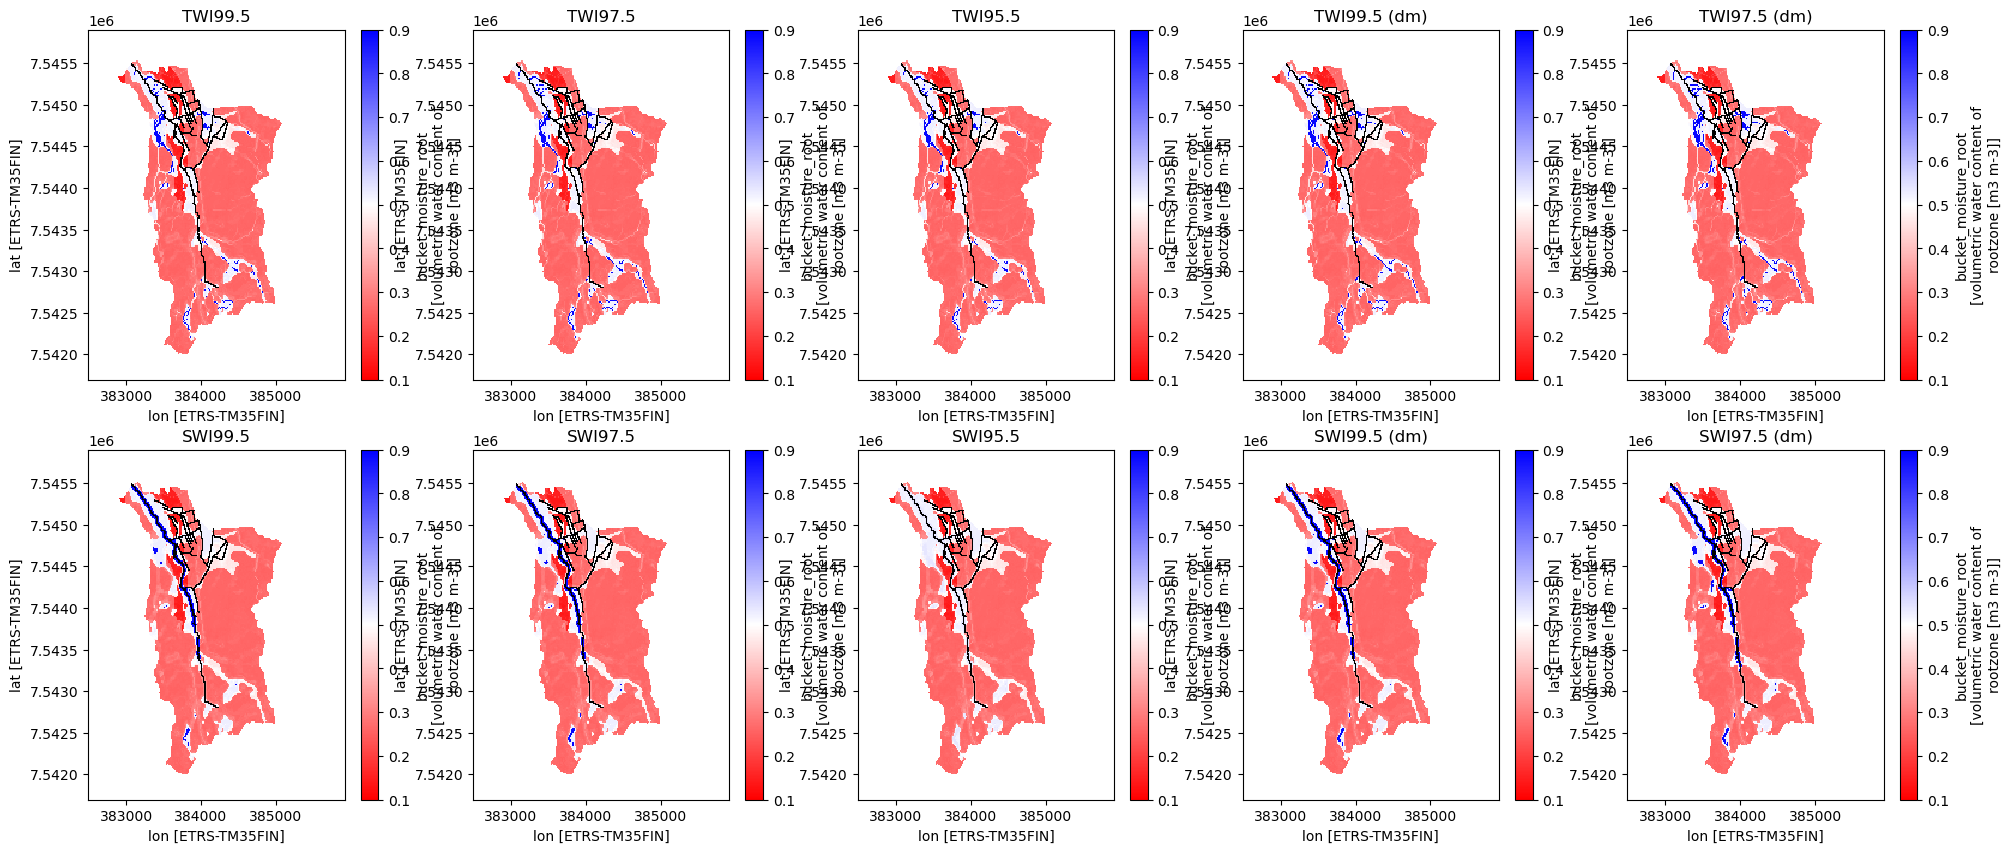

In [21]:
date = '2021-06-17'

plt.figure(figsize=(24,10))
ax = plt.subplot(2,5,1)
twi1['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI99.5')
plt.subplot(2,5,2, sharex=ax, sharey=ax)
twi2['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI97.5')
plt.subplot(2,5,3, sharex=ax, sharey=ax)
twi3['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI95.5')
plt.subplot(2,5,4, sharex=ax, sharey=ax)
twi4['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI99.5 (dm)')
plt.subplot(2,5,5, sharex=ax, sharey=ax)
twi5['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI97.5 (dm)')
plt.subplot(2,5,6, sharex=ax, sharey=ax)
swi1['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI99.5')
plt.subplot(2,5,7, sharex=ax, sharey=ax)
swi2['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI97.5')
plt.subplot(2,5,8, sharex=ax, sharey=ax)
swi3['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI95.5')
plt.subplot(2,5,9, sharex=ax, sharey=ax)
swi4['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI99.5 (dm)')
plt.subplot(2,5,10, sharex=ax, sharey=ax)
swi5['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI97.5 (dm)')

#### Actual wet day...

Text(0.5, 1.0, 'SWI97.5 (dm)')

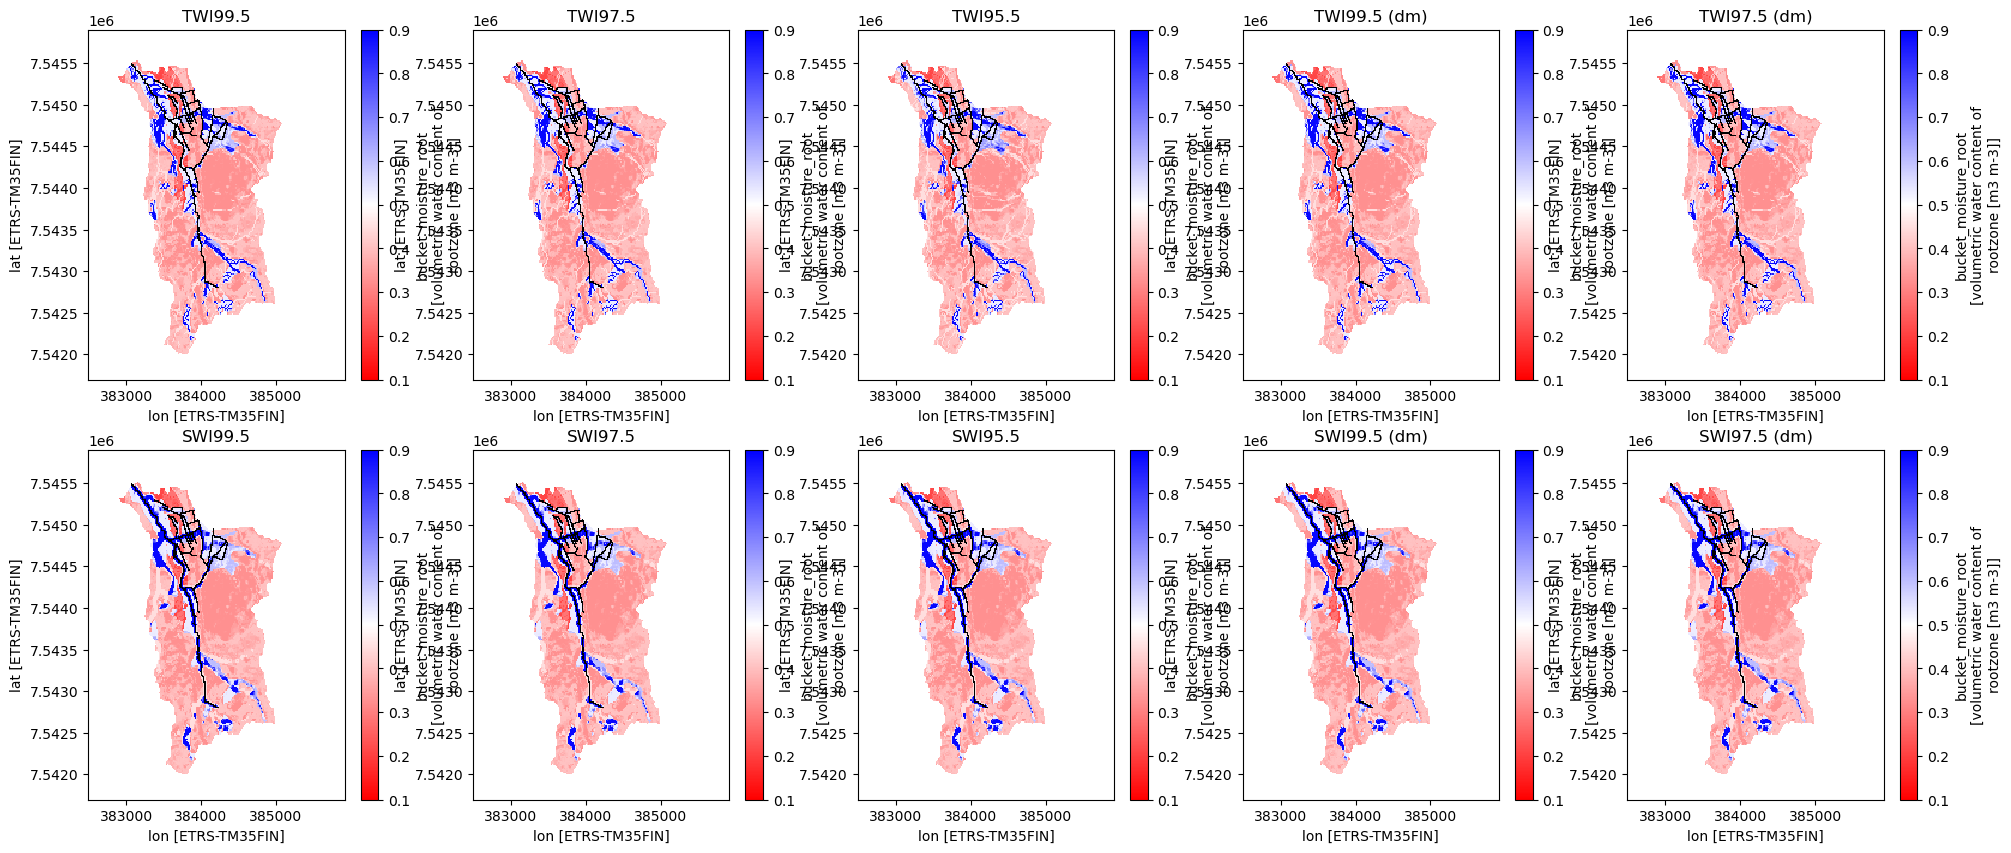

In [22]:
date = '2021-06-01'

plt.figure(figsize=(24,10))
ax = plt.subplot(2,5,1)
twi1['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI99.5')
plt.subplot(2,5,2, sharex=ax, sharey=ax)
twi2['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI97.5')
plt.subplot(2,5,3, sharex=ax, sharey=ax)
twi3['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI95.5')
plt.subplot(2,5,4, sharex=ax, sharey=ax)
twi4['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI99.5 (dm)')
plt.subplot(2,5,5, sharex=ax, sharey=ax)
twi5['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI97.5 (dm)')
plt.subplot(2,5,6, sharex=ax, sharey=ax)
swi1['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI99.5')
plt.subplot(2,5,7, sharex=ax, sharey=ax)
swi2['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI97.5')
plt.subplot(2,5,8, sharex=ax, sharey=ax)
swi3['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI95.5')
plt.subplot(2,5,9, sharex=ax, sharey=ax)
swi4['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI99.5 (dm)')
plt.subplot(2,5,10, sharex=ax, sharey=ax)
swi5['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI97.5 (dm)')

#### 'Dry day' as in article

Text(0.5, 1.0, 'SWI97.5 (dm)')

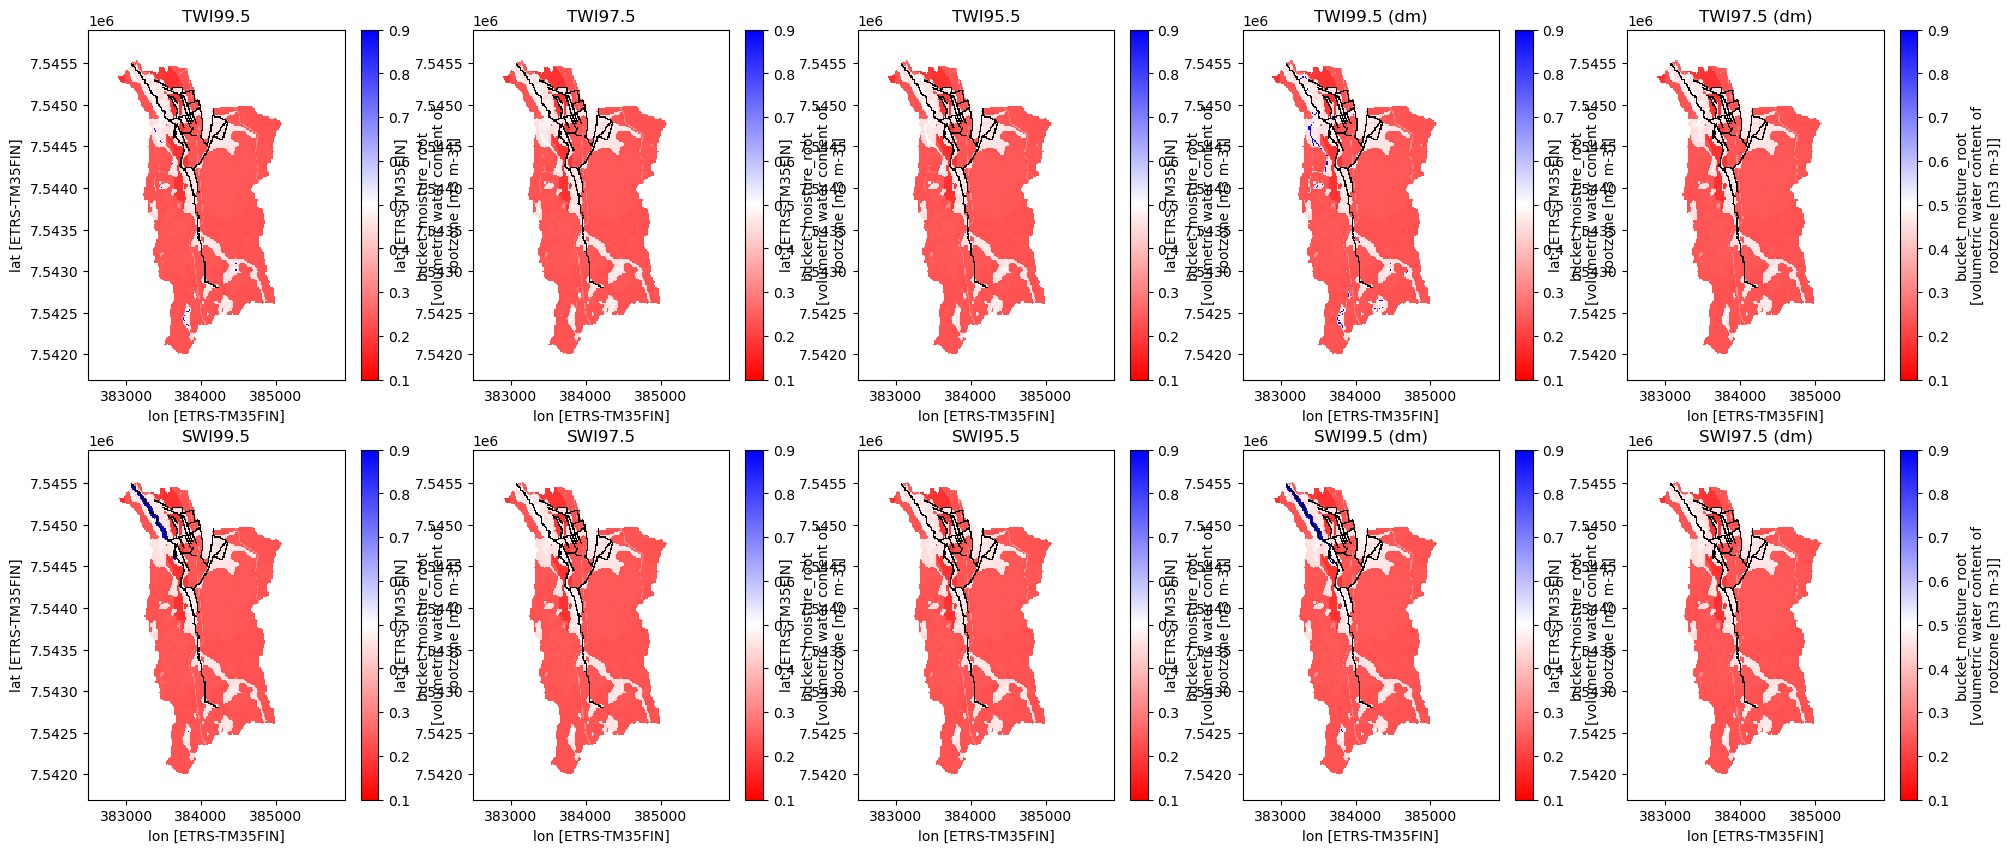

In [23]:
date = '2021-09-01'

plt.figure(figsize=(24,10))
ax = plt.subplot(2,5,1)
twi1['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI99.5')
plt.subplot(2,5,2, sharex=ax, sharey=ax)
twi2['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI97.5')
plt.subplot(2,5,3, sharex=ax, sharey=ax)
twi3['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI95.5')
plt.subplot(2,5,4, sharex=ax, sharey=ax)
twi4['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI99.5 (dm)')
plt.subplot(2,5,5, sharex=ax, sharey=ax)
twi5['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
twi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('TWI97.5 (dm)')
plt.subplot(2,5,6, sharex=ax, sharey=ax)
swi1['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI99.5')
plt.subplot(2,5,7, sharex=ax, sharey=ax)
swi2['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI97.5')
plt.subplot(2,5,8, sharex=ax, sharey=ax)
swi3['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI95.5')
plt.subplot(2,5,9, sharex=ax, sharey=ax)
swi4['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI99.5 (dm)')
plt.subplot(2,5,10, sharex=ax, sharey=ax)
swi5['bucket_moisture_root'].sel(time=date).plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
swi5['parameters_ditches'].plot(cmap='binary', vmin=-11, vmax=-1, add_colorbar=False)
plt.title('SWI97.5 (dm)')

### Absolute differences between cutoff parameters and TWI & SWI
#### 'Wet day' as in article, actual wet day and dry day

Text(0.5, 1.0, '2021-09-01')

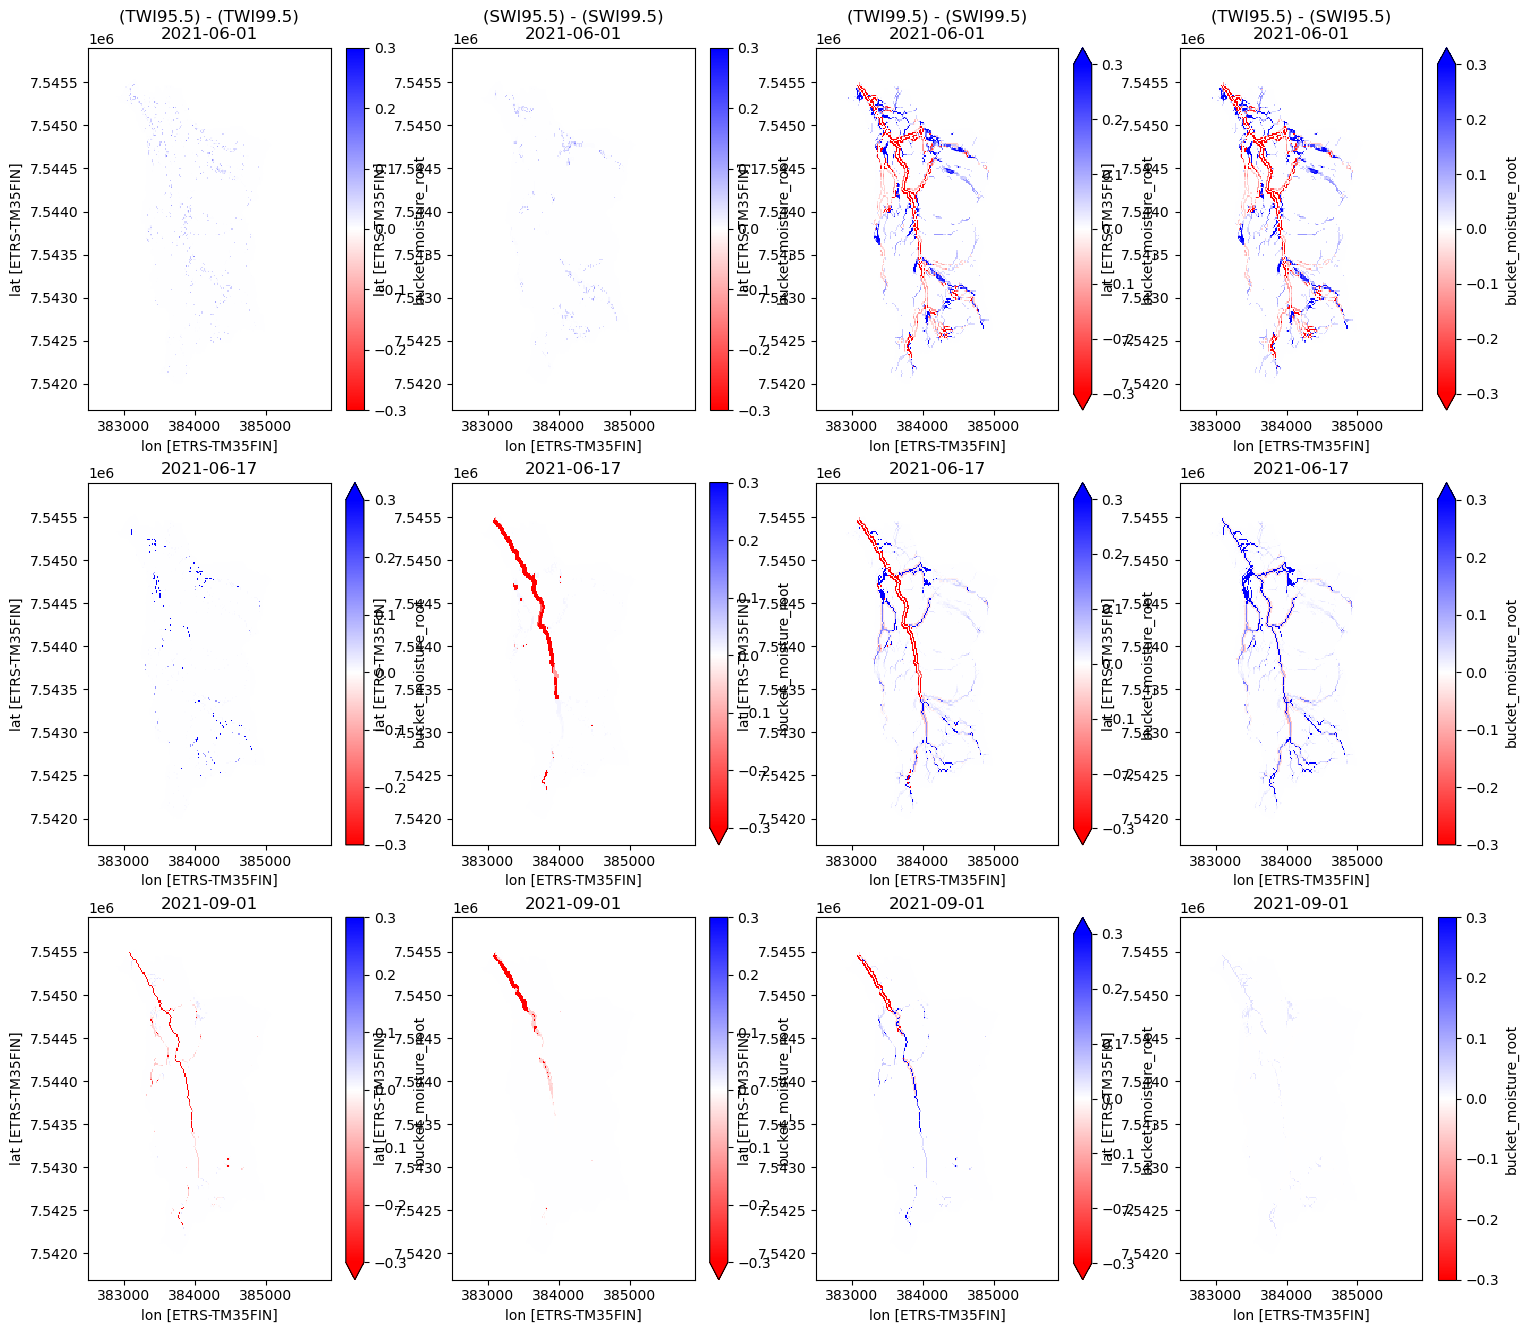

In [3]:
date = '2021-06-01'

plt.figure(figsize=(18,16))
plt.subplot(3,4,1)
(twi3['bucket_moisture_root'].sel(time=date)-twi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'(TWI95.5) - (TWI99.5)\n{date}')
plt.subplot(3,4,2)
(swi3['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'(SWI95.5) - (SWI99.5)\n{date}')
plt.subplot(3,4,3)
(twi1['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'(TWI99.5) - (SWI99.5)\n{date}')
plt.subplot(3,4,4)
(twi3['bucket_moisture_root'].sel(time=date)-swi3['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'(TWI95.5) - (SWI95.5)\n{date}')

date = '2021-06-17'

plt.subplot(3,4,5)
(twi3['bucket_moisture_root'].sel(time=date)-twi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,6)
(swi3['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,7)
(twi1['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,8)
(twi3['bucket_moisture_root'].sel(time=date)-swi3['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')

date = '2021-09-01'

plt.subplot(3,4,9)
(twi3['bucket_moisture_root'].sel(time=date)-twi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,10)
(swi3['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,11)
(twi1['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,12)
(twi3['bucket_moisture_root'].sel(time=date)-swi3['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')


Text(0.5, 1.0, '2021-09-01')

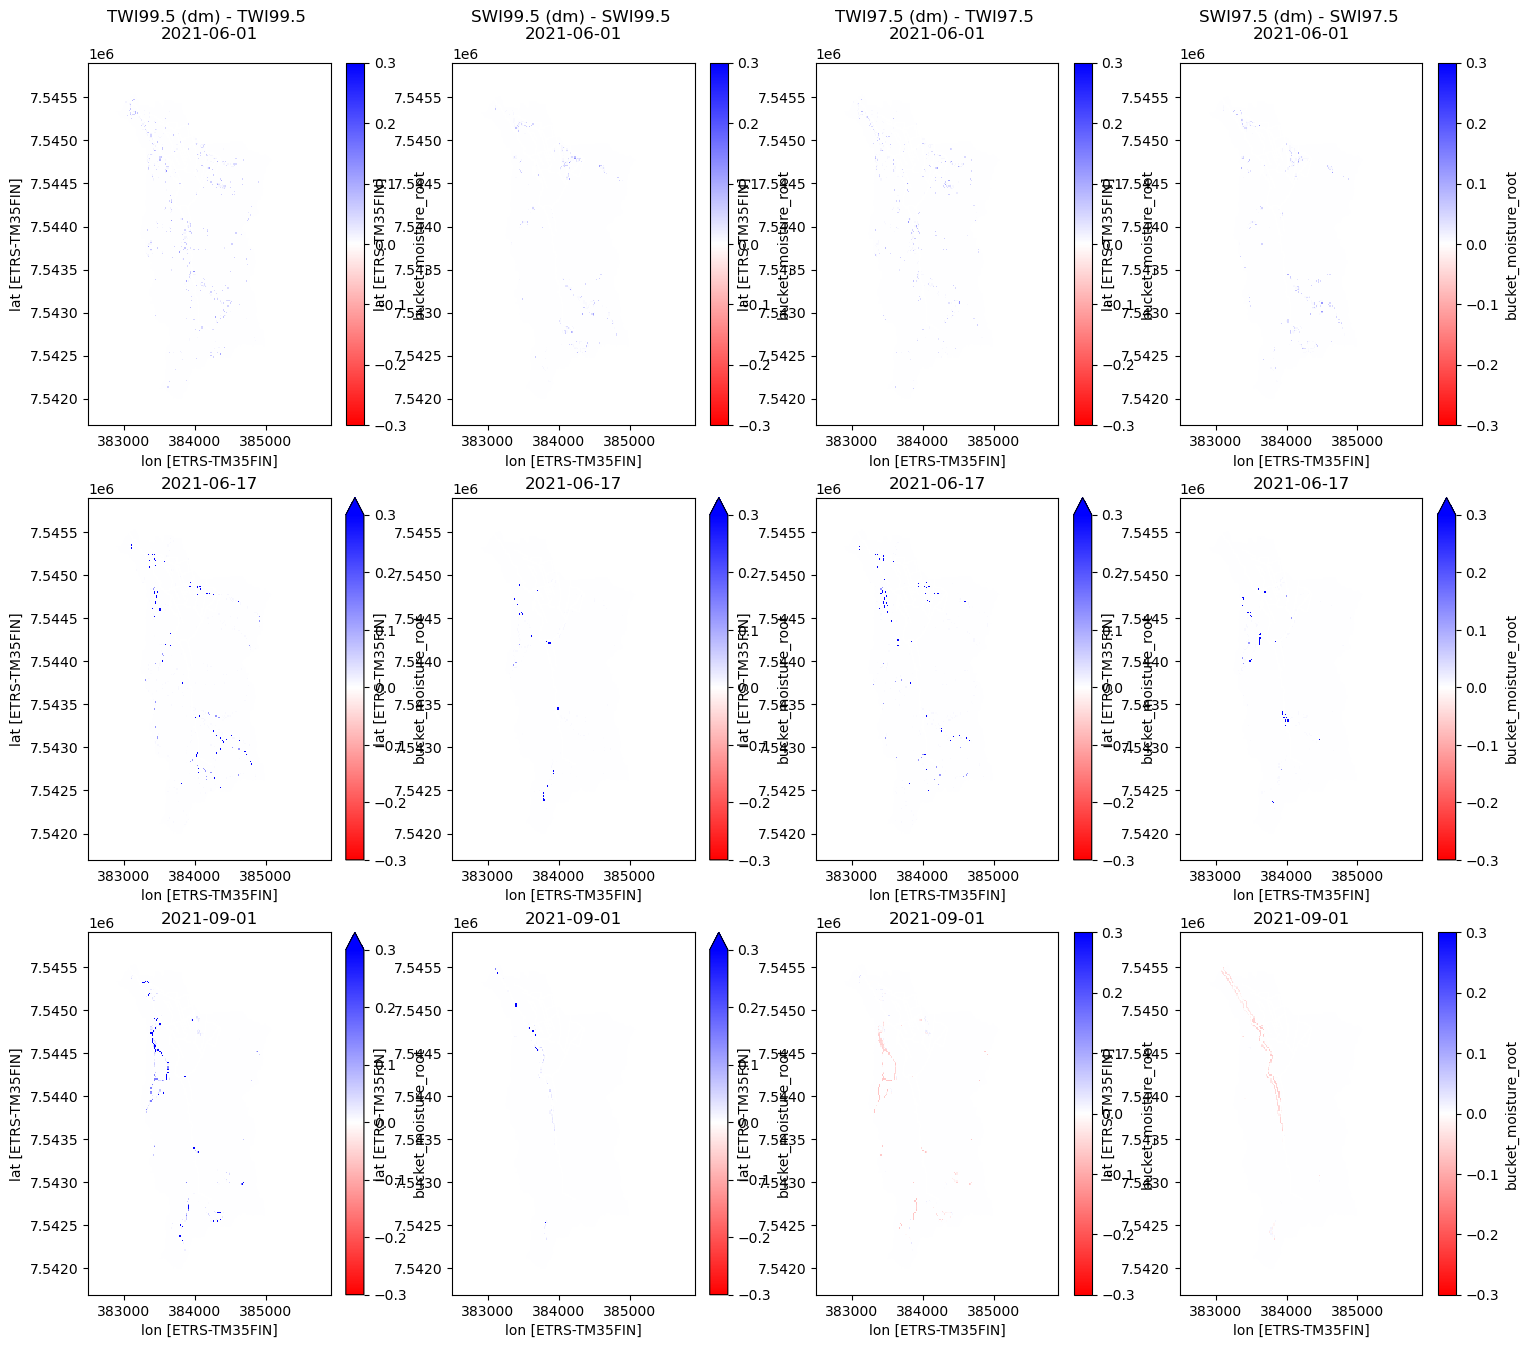

In [10]:
date = '2021-06-01'

plt.figure(figsize=(18,16))
plt.subplot(3,4,1)
(twi4['bucket_moisture_root'].sel(time=date)-twi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'TWI99.5 (dm) - TWI99.5 \n{date}')
plt.subplot(3,4,2)
(swi4['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'SWI99.5 (dm) - SWI99.5 \n{date}')
plt.subplot(3,4,3)
(twi5['bucket_moisture_root'].sel(time=date)-twi2['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'TWI97.5 (dm) - TWI97.5 \n{date}')
plt.subplot(3,4,4)
(swi5['bucket_moisture_root'].sel(time=date)-swi2['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'SWI97.5 (dm) - SWI97.5 \n{date}')

date = '2021-06-17'

plt.subplot(3,4,5)
(twi4['bucket_moisture_root'].sel(time=date)-twi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,6)
(swi4['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,7)
(twi5['bucket_moisture_root'].sel(time=date)-twi2['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,8)
(swi5['bucket_moisture_root'].sel(time=date)-swi2['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')

date = '2021-09-01'

plt.subplot(3,4,9)
(twi4['bucket_moisture_root'].sel(time=date)-twi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,10)
(swi4['bucket_moisture_root'].sel(time=date)-swi1['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,11)
(twi5['bucket_moisture_root'].sel(time=date)-twi2['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')
plt.subplot(3,4,12)
(swi5['bucket_moisture_root'].sel(time=date)-swi2['bucket_moisture_root'].sel(time=date)).plot(cmap='bwr_r', vmin=-0.3, vmax=0.3)
plt.title(f'{date}')


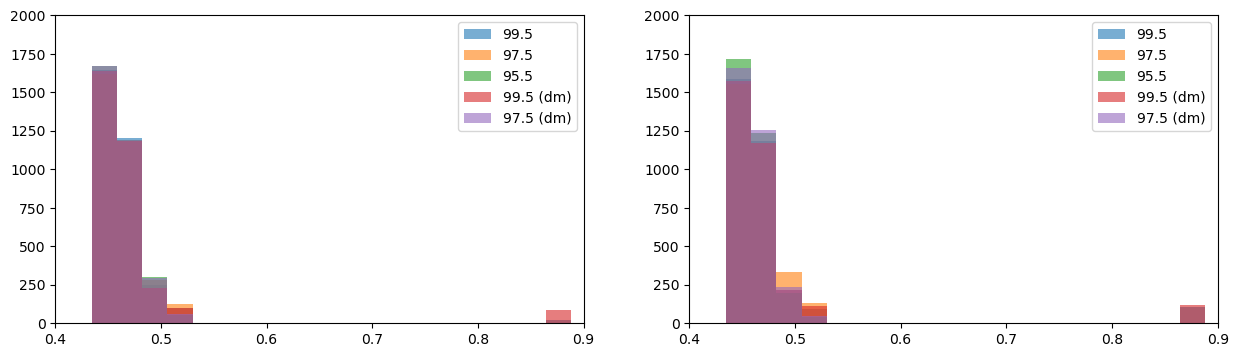

In [14]:
date = '2021-09-01'
bins = 30

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
n, bins, hist = plt.hist((twi1['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='99.5')
n, bins, hist = plt.hist((twi2['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='97.5')
n, bins, hist = plt.hist((twi3['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='95.5')
n, bins, hist = plt.hist((twi4['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='99.5 (dm)')
n, bins, hist = plt.hist((twi5['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='97.5 (dm)')
plt.ylim([0, 2000])
plt.xlim([0.4,0.9])
plt.legend()
plt.subplot(1,2,2)
n, bins, hist = plt.hist((swi1['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='99.5')
n, bins, hist = plt.hist((swi2['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='97.5')
n, bins, hist = plt.hist((swi3['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='95.5')
n, bins, hist = plt.hist((swi4['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='99.5 (dm)')
n, bins, hist = plt.hist((swi5['bucket_moisture_root'].sel(time=date)*ditchmask).values.flatten(), alpha=0.6, bins=bins, label='97.5 (dm)')
plt.ylim([0, 2000])
plt.xlim([0.4,0.9])
plt.legend()